# Задание-1

В ноутбуке про многоруких бандитов мы разбирали классы для реализации отдельных стратегий решения задачки. Реализуйте в той же парадигме стратегии [exp3](https://jamesrledoux.com/algorithms/bandit-algorithms-epsilon-ucb-exp-python/) и [softmax](https://gibberblot.github.io/rl-notes/single-agent/multi-armed-bandits.html) стратегии. Да, вы не ошиблись, они уже сделаны, надо понять, как оно работает и сделать так, чтобы оно работало в использованной нами конфигурации)

---


Код к первому заданию в папке `bandito`

 - `bernoulli_bandit.py` - реализация ручек (из урока)
 - `exp3.py` - реализация подхода exp3
 - `softmax.py` - реализация подхода softmax
 - `solvers.py` - базовый класс для стратегий и остальные классы (из урока)
 - `utils.py` - методы для отрисовки и пр (из урока, подпиленные чуть-чуть)

---

Истинные вероятности выигрыша у Бернуллиевского бандита:
 [0.7954469928097472, 0.22963971355933732, 0.10773366663258943, 0.34687139997514527, 0.4659787102640549, 0.8506016787245124, 0.446874890919965, 0.2514516988722224, 0.6226997843409401, 0.3506074513833978]
У лучшей ручки индекс: 5 и вероятность: 0.8506016787245124


EXP3:   0%|          | 0/10000 [00:00<?, ?it/s]

EXP3:   0%|          | 0/10000 [00:00<?, ?it/s]

Softmax:   0%|          | 0/10000 [00:00<?, ?it/s]

Softmax:   0%|          | 0/10000 [00:00<?, ?it/s]

UCB1:   0%|          | 0/10000 [00:00<?, ?it/s]

ThompsonSampling:   0%|          | 0/10000 [00:00<?, ?it/s]

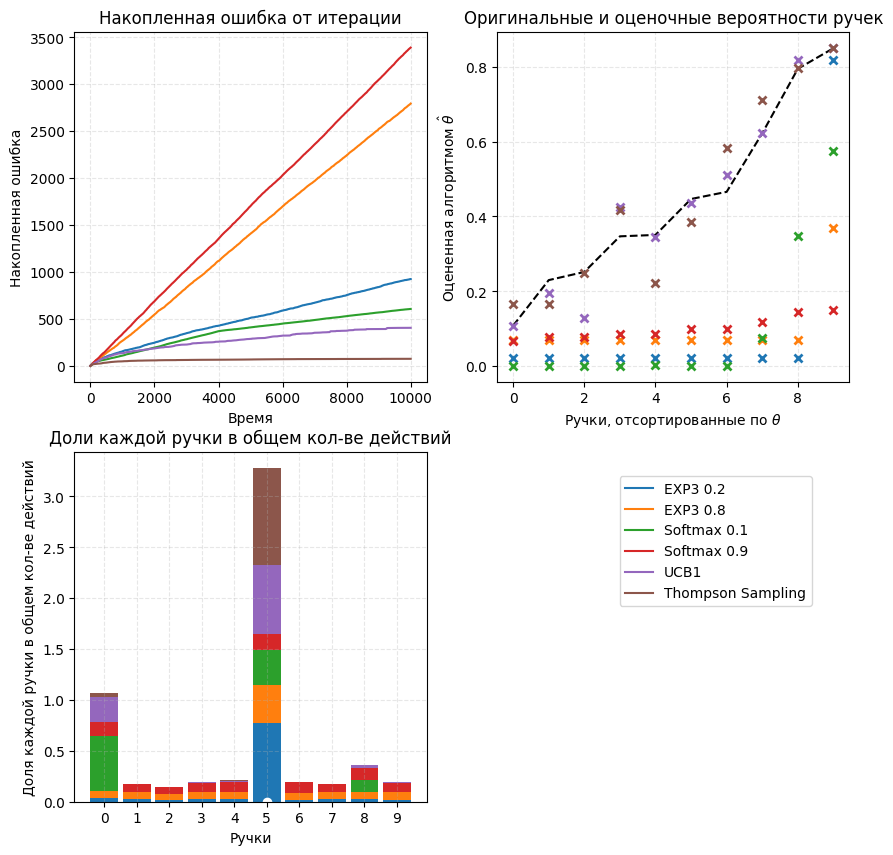

In [8]:
from bandito.bernoulli_bandit import BernoulliBandit
from bandito.exp3 import EXP3
from bandito.softmax import Softmax
from bandito.solvers import *
from bandito.utils import experiment

bandit = BernoulliBandit(10)

solvers = {
    'EXP3 0.2': EXP3(bandit, gamma=0.2),
    'EXP3 0.8': EXP3(bandit, gamma=0.7),
    'Softmax 0.1': Softmax(bandit, tau=0.1),
    'Softmax 0.9': Softmax(bandit, tau=0.9),
    'UCB1': UCB1(bandit),
    # 'Bayesian UCB':   BayesianUCB(bandit, 2, 1, 1),
    'Thompson Sampling': ThompsonSampling(bandit, 1, 1)
}

experiment(10000, bandit, solvers)

# Задание 2

В ДЗ по ML вы уже реализовали классы для того, чтобы делать логистические регрессии. Релизуйте класс, который будет из этих регрессий собирать полносвязный перцептрон из 2 слоев с 2 нейронами каждый и третьего выходного слоя. В качестве функции активации используйте сигмоиду, как в логистической регрессии. Если сделаете возможность в качестве активации выбирать ReLu и tanh в дополнение к сигмоиде, будете большими молодцами. Если можно будет задавать количество слоев и количество нейронов в слое, будете вдвойне молодцами) (но базовое требование - два слоя по два нейрона кадлый + 1 выходной слой) 

[Пример](https://github.com/pileyan/ML-From-Scratch/blob/master/mlfromscratch/supervised_learning/multilayer_perceptron.py)

Да, вы снова не ошиблись! реализация уже есть! Но у нас же тут с Вами курс по ПИТОНУ, а не ML :D

Про перцептрон [раз](https://www.simplilearn.com/tutorials/deep-learning-tutorial/perceptron), [два](https://mlcourse.at.ispras.ru/wp-content/uploads/2020/09/intro_to_nn_2020.pdf)

---


Код ко второму заданию в папке `perceptronito`

 - `activation_functions.py` - разные функции активации
 - `layer.py` - реализация объекта слой
 - `perceptron.py` - реализация самого перцептрона

---

In [15]:
from perceptronito.layer import DenseLayer
from perceptronito.perceptron import MultilayerPerceptron
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples=100, n_features=3,
                           n_informative=3, n_redundant=0)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)


p = MultilayerPerceptron(
    n_inputs=X_train.shape[1],
    layers=[
        DenseLayer(n_units=2),
        DenseLayer(n_units=3),
        DenseLayer(n_units=1)
    ],
    epochs=1000)

p.fit(X_train, y_train)
p.predict(X_test).tolist()


  0%|          | 0/1000 [00:00<?, ?it/s]

[[0.7049041021684416],
 [0.7043544899501705],
 [0.7052853515861092],
 [0.7153506226545464],
 [0.6997390176982446],
 [0.7017623333679441],
 [0.6926437901089272],
 [0.7051037369231054],
 [0.6807589994997988],
 [0.7074114312753801],
 [0.7166593700327758],
 [0.7078592013728771],
 [0.7135955255677661],
 [0.6967925423847232],
 [0.7072588780364493],
 [0.6839802332955783],
 [0.6950841385991703],
 [0.6983543572883335],
 [0.6989404676351927],
 [0.7130447849885861],
 [0.6912395856259148],
 [0.7086803977011916],
 [0.7009130456985051],
 [0.6970007254947524],
 [0.68100879184871],
 [0.7116701655702441],
 [0.7146055310349849],
 [0.690035654229909],
 [0.6965325619822366],
 [0.6967160411234141]]

<img src="cato.jpeg" width="400"/><img src="popug.jpeg" width="400"/>




